## Analisi dati covid19 delle provincie italiane

i dati grezzi sono scaricati dai seguenti repository:
* dati aggiornati sull'infezione dal repository della protezione civile: https://github.com/pcm-dpc/COVID-19
* dati geografici sui confini amministrativi dal repository di openpolis: https://github.com/openpolis

### importazione dei dati sull'infezione in un dataframe pandas

In [1]:
import pandas
from datetime import datetime, timedelta

cv_df = pandas.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv",parse_dates=['data'])
latest = cv_df['data'].max()
first = cv_df['data'].min()
before_latest = latest - timedelta(days=1)
print (first,latest,before_latest)
cv_df

2020-02-24 18:00:00 2020-03-13 17:00:00 2020-03-12 17:00:00


,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi
0,2020-02-24 18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0.0
1,2020-02-24 18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0.0
2,2020-02-24 18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0.0
3,2020-02-24 18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0.0
4,2020-02-24 18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,NaN,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
2427,2020-03-13 17:00:00,ITA,5,Veneto,26,Treviso,TV,45.667546,12.245074,327.0
2428,2020-03-13 17:00:00,ITA,5,Veneto,27,Venezia,VE,45.434905,12.338452,248.0
2429,2020-03-13 17:00:00,ITA,5,Veneto,23,Verona,VR,45.438390,10.993527,210.0
2430,2020-03-13 17:00:00,ITA,5,Veneto,24,Vicenza,VI,45.547497,11.545971,141.0


### Filtro dei risultati per campo regione e per l'ultimo giorno di aggiornamento

In [2]:
from datetime import datetime
regione = "Piemonte"
cv_df_target = cv_df.loc[cv_df["data"]==latest]
cv_df_target = cv_df_target.loc[cv_df_target["denominazione_regione"] == regione]
cv_df_target.head()

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi
2374,2020-03-13 17:00:00,ITA,1,Piemonte,6,Alessandria,AL,44.912974,8.615401,136.0
2375,2020-03-13 17:00:00,ITA,1,Piemonte,5,Asti,AT,44.899129,8.204143,70.0
2376,2020-03-13 17:00:00,ITA,1,Piemonte,96,Biella,BI,45.566511,8.054082,48.0
2377,2020-03-13 17:00:00,ITA,1,Piemonte,4,Cuneo,CN,44.393296,7.551172,40.0
2378,2020-03-13 17:00:00,ITA,1,Piemonte,3,Novara,NO,45.445885,8.621916,48.0


### Generazione di un grafico a barre dei dati aggiornati

Text(0.5, 1.0, '2020-03-13 17:00:00 - casi in terapia intensiva')

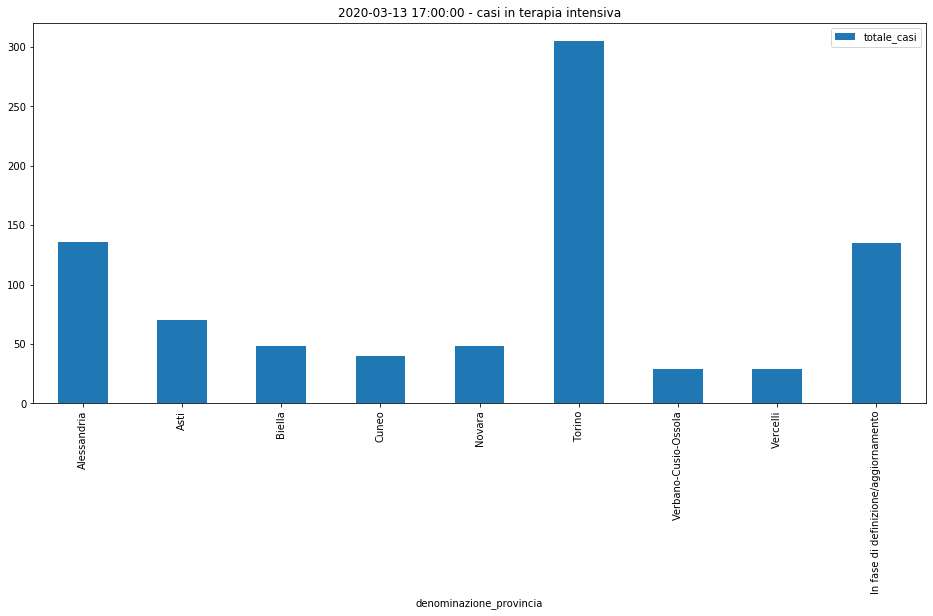

In [3]:
import matplotlib

ax = cv_df_target.plot.bar(x='denominazione_provincia', y='totale_casi', figsize=(16, 7))
ax.set_title(str(latest) + ' - casi in terapia intensiva')

### Importazione dei limiti amministrativi delle provincie italiane in un dataframe geopandas

In [18]:
import geopandas

geo_df = geopandas.read_file("https://raw.githubusercontent.com/openpolis/geojson-italy/master/geojson/limits_IT_provinces.geojson")
geo_df.crs = "EPSG:4326"
geo_df.head()

,prov_name,prov_istat_code_num,prov_acr,reg_name,reg_istat_code,reg_istat_code_num,prov_istat_code,geometry
0,Torino,1,TO,Piemonte,01,1,001,"POLYGON ((7.89397 45.58222, 7.89654 45.57985, ..."
1,Vercelli,2,VC,Piemonte,01,1,002,"POLYGON ((7.92900 45.74244, 7.92584 45.74196, ..."
2,Novara,3,NO,Piemonte,01,1,003,"POLYGON ((8.42079 45.82981, 8.42028 45.83010, ..."
3,Cuneo,4,CN,Piemonte,01,1,004,"MULTIPOLYGON (((6.94540 44.42794, 6.94734 44.4..."
4,Asti,5,AT,Piemonte,01,1,005,"POLYGON ((7.96685 45.11667, 7.96729 45.11673, ..."


### Merge dei dati precedentemente processati

In [19]:
cv_df_geo = geo_df.merge(cv_df_target, left_on='prov_acr', right_on='sigla_provincia')
cv_df_geo.head()

,prov_name,prov_istat_code_num,prov_acr,reg_name,reg_istat_code,reg_istat_code_num,prov_istat_code,geometry,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi
0,Torino,1,TO,Piemonte,01,1,001,"POLYGON ((7.89397 45.58222, 7.89654 45.57985, ...",2020-03-13 17:00:00,ITA,1,Piemonte,1,Torino,TO,45.073274,7.680687,305.0
1,Vercelli,2,VC,Piemonte,01,1,002,"POLYGON ((7.92900 45.74244, 7.92584 45.74196, ...",2020-03-13 17:00:00,ITA,1,Piemonte,2,Vercelli,VC,45.323981,8.423234,29.0
2,Novara,3,NO,Piemonte,01,1,003,"POLYGON ((8.42079 45.82981, 8.42028 45.83010, ...",2020-03-13 17:00:00,ITA,1,Piemonte,3,Novara,NO,45.445885,8.621916,48.0
3,Cuneo,4,CN,Piemonte,01,1,004,"MULTIPOLYGON (((6.94540 44.42794, 6.94734 44.4...",2020-03-13 17:00:00,ITA,1,Piemonte,4,Cuneo,CN,44.393296,7.551172,40.0
4,Asti,5,AT,Piemonte,01,1,005,"POLYGON ((7.96685 45.11667, 7.96729 45.11673, ...",2020-03-13 17:00:00,ITA,1,Piemonte,5,Asti,AT,44.899129,8.204143,70.0


## Visualizzazione di una carta tematica

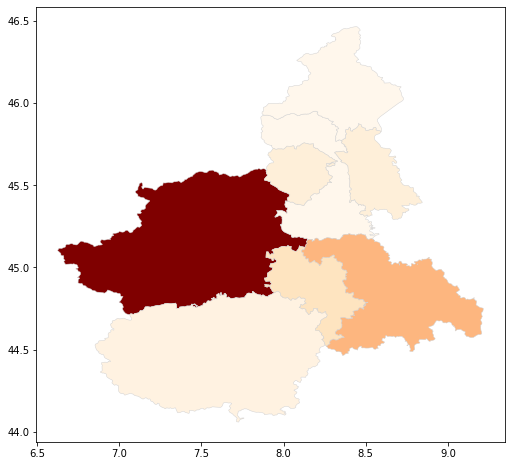

In [22]:
import descartes

cv_df_geo.plot(column="totale_casi", cmap='OrRd', edgecolor = "lightgrey", linewidth = 0.5, figsize=(18, 8))


## Generazione di un grafico della progressione temportale dei casi

In [7]:
cv_pro1 = "Torino"
cv_df_progress1 = cv_df.loc[cv_df["denominazione_provincia"]==cv_pro1]

cv_pro2 = "Padova"
cv_df_progress2 = cv_df.loc[cv_df["denominazione_provincia"]==cv_pro2]
cv_df_progress2.head()


,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi
75,2020-02-24 18:00:00,ITA,1,Piemonte,1,Torino,TO,45.073274,7.680687,0.0
203,2020-02-25 18:00:00,ITA,1,Piemonte,1,Torino,TO,45.073274,7.680687,3.0
331,2020-02-26 18:00:00,ITA,1,Piemonte,1,Torino,TO,45.073274,7.680687,3.0
459,2020-02-27 18:00:00,ITA,1,Piemonte,1,Torino,TO,45.073274,7.680687,2.0
587,2020-02-28 18:00:00,ITA,1,Piemonte,1,Torino,TO,45.073274,7.680687,11.0


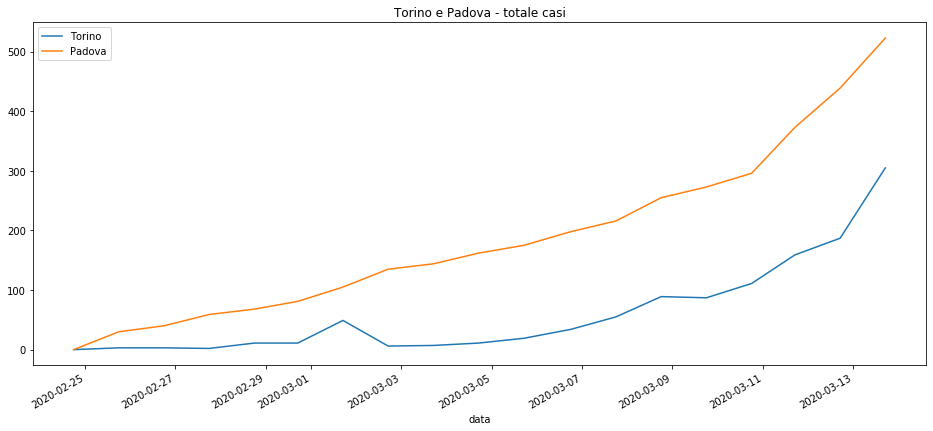

In [9]:
ax = cv_df_progress1.plot(x='data', y='totale_casi', figsize=(16, 7))
ax = cv_df_progress2.plot(ax = ax, x='data', y='totale_casi', figsize=(16, 7))
ax.set_title('%s e %s - totale casi' % (cv_pro1,cv_pro2))
ax.legend((cv_pro1, cv_pro2))